## Model

<font  face=Times color=darkblue size=3> The model hamiltonian is: $$H=J\sum_{<i,j>}\vec{S_i}\cdot \vec{S_j}=J\sum_{<i,j>}(\frac{1}{2}(S_i^+S_j^-+S_i^-S_j^+)+S_i^zS_j^z)$$ with the spin raising/lowering operators.<br><br> We consider $S=1/2$ 1-dimensional spin chain here.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import csv

<font  face=Times color=darkblue size=3> In the 1st notebook, we directly construct the complete matrix of the Hamiltonian and directly diagonalize it. But by doing so, we have some problems: <br> 1.  The matrix size $M=2^N$ becomes too large quickly. <br> 2. Maximum $N\leq 20$. <br> 3. There are $M^2$ matrix elements to store, and the time to diagonalize is proportional to $M^3$.
    <br><br> Therefore, we can choose the basis in such a way that the Hamiltonian becomes block-diagonal, and the blocks can be diagonalized individually. By doing so, we can reach larger N (not much larger, $N\approx 40$ is max).

### Magnetization Conservation

<font  face=Times color=darkblue size=3 > The simplest example is to use magnetizaiton conservation: $$m_z=\sum_i^N S_i^z\ .$$ Then each block corresponds to fixed value of $m_z$, and there is no matrix elements between states of different $m_z$.
    <br><br> So, the 1st step is to sort the states according to their values of $m_z$. Then construct each block-matrix and diagonalize individually.

In [ ]:
# set parameters
N=10
dimension=2**N
#spin chain with all spin-down
z='0'*N


In [ ]:
method=1;   # 0 or 1 corresponds to different way of flipping

In [ ]:
energy={} # {} dictionary , [] list
for num_up in range(0,N+1): # we use the number of spin_ups to specify the blocks
    # first, find the states with corresponding mz
    state_list=[]
    for state in range(dimension):
        chain_here=bin(state)[2:] # the spin chain
        num_spinup=chain_here.count('1')
        if num_spinup==num_up:
            state_list.append(state)
    #then,build the block-matrix
    Hmz=np.zeros((len(state_list),len(state_list)))
    for a in range(len(state_list)):
        for i in range(N):
            # we use PBC
            j=np.mod(i+1,N)
            s_a=bin(state_list[a])[2:]
            s_a=z[0:N-len(s_a)]+s_a
            if s_a[i]==s_a[j]:
                Hmz[a,a]+=0.25
            else:
                Hmz[a,a]-=0.25
                chain_new=copy.deepcopy(s_a)
                element_i=chain_new[i]
                element_j=chain_new[j]
                if method==0:
                    if j==0:  # this is the concatenation way to exchange i and j
                        chain_new=element_i+chain_new[1:N-1]+element_j
                    else:
                        chain_new=chain_new[0:i]+element_j+element_i+chain_new[j+1:]
                    r=int(chain_new,2)

                else: # using the .join way to exchange the i and j
                    chain1=list(chain_new)
                    chain1[i]=element_j
                    chain1[j]=element_i
                    r=int(''.join(chain1),2)
#                if r in state_list:
# actually this if is redundant, since the off-diagonal operator will not bring state b outside the block, as the off-diagonal operator will not change the total Mz.
                b=state_list.index(r)  # find b after flip
                Hmz[a,b]=0.5
    eig_v=np.real(np.linalg.eig(Hmz)[0])
    energy[num_up]=eig_v

In [ ]:
energy[2],len(energy[2])

(array([-1.37938524, -1.01812425,  2.5       , -1.01812425, -0.95461157,
        -0.95461157, -0.5       ,  2.03208889,  2.30901699,  2.30901699,
         2.17232789,  2.17232789, -0.28968334, -0.38397803, -0.38397803,
        -0.28968334,  1.5       ,  1.83894474,  1.83894474,  1.80901699,
         1.80901699,  1.59555949, -0.07598452,  1.59555949,  1.46708663,
         1.46708663, -0.07598452,  0.84729636,  1.19098301,  1.19098301,
         1.05977728,  1.05977728,  0.8264627 ,  0.8264627 ,  0.69098301,
         0.69098301,  0.35405029,  0.35405029,  0.17850795,  0.17850795,
         0.22966475,  0.22966475,  0.5       ,  0.5       ,  0.5       ]),
 45)

<font  face=Times color=darkblue size=3 > Since we use the number of spin-ups to specify the blocks, remember here $m_z=(n_{\uparrow}-n_{\downarrow})/2$ for $S=1/2$ Heisenberg model.

Text(0, 0.5, 'Energy')

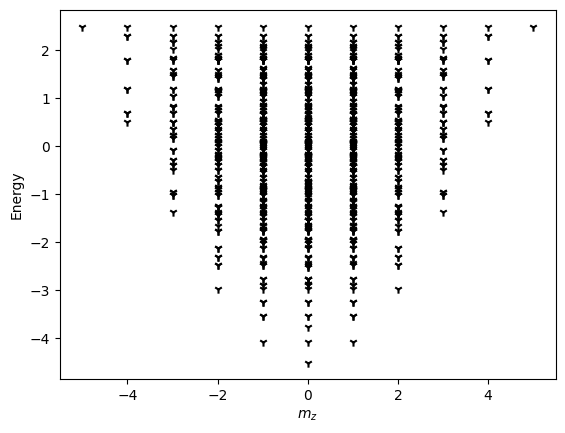

In [ ]:
for i in range(N+1):
    plt.scatter([(i-(N-i))/2]*len(energy[i]),energy[i],marker='1',color='black')
plt.xlabel('$m_z$')
plt.ylabel('Energy')

<font  face=Times color=darkblue size=3 > You can see that, for even $N$, the ground state is when $m_z=0$. You can check the situation of odd $N$.

### Momentum States (translationally invariant systems)

<font  face=Times color=darkblue size=3>\ A periodic chain (ring) is translationally invariant and we define a translation operator which moves the spins one step cyclically to the "right": $$\hat{T}|S_0^z,S_1^z,...,S_{N-1}^z>=|S_{N-1}^z,S_0^z,\dots,S_{N-2}^z>.$$ The Hamiltonian commutes with the translation operator: $[H,T]=0$. So we can construct momentum states $|\psi(k)>$ as the eigenstates of the translation operator, $$\hat T|\psi(k)>=e^{ik}|\psi(k)>,$$ with $k=2m\pi/N$ and $m=0,1,2,\dots,N-1$.
<br><br> A momentum state can be constructed from any representative state: $|a(k)>=\frac{1}{\sqrt{N_a}}\sum_{r=0}^{N-1}e^{-ikr}T^r|a>$. We can obtain the momentum states from the representative states in each block with specific $k$.<br> Remember the translation invariance, the total weight of the component for $R$ $(T^R|a\rangle=|a\rangle)$ is: $1+e^{-ikR}+e^{-i2kR}+\dots+e^{-ik(N-R)}$. The state can survive when $kR=2n\pi$ and the weight of the representative is $N/R$.<br> Therefore, for each block ($k$), the first step is to find the representative states which satisfy the requirements. Notice that for any group of translationally invariant states, we take the lowest integer as the representative.
    <br><br> To build each block-matrix, we can rewrite the Hamiltonian as: $H_0=\sum_{j}^NS_j^zS_{j+1}^z$, and $H_j=\frac{1}{2}(S_j^+S_{j+1}^-+S_j^-S_{j+1}^+).$  <br> In the momentum states: $$H|a(k)>=\frac{1}{\sqrt{N_a}}\sum_{j=0}^N\sum_{r=0}^{N-1}e^{-ikr}T^rH_j|a>.$$  In addition, $H_j|a>=h_a^jT^{-l_j}|b_j>$, the $h_a^j$ is the eigenvalue, and $|b_j>$ is another representative state. Therefore, by using the definition of momentum states and removing the summation index $r$, we have: $$H|a(k)>=\sum_{j=0}^Nh_a^je^{-ikl_j}\sqrt{\frac{N_{b_j}}{N_a}}|b_j(k)>.$$ <br> The diagonal and off-diagonal block-matrix elements can be represented as: $$<a(k)|H_0|a(k)>=\sum_j^NS_j^zS_{j+1}^z;$$ $$<b_j(k)|H_{j>0}|a(k)>=\frac{1}{2}e^{-ikl_j}\sqrt{\frac{R_a}{R_{b_j}}}.$$

### A real example of 4-site problem

<font  face=Times color=darkblue size=3>
In this case, at the $m_z=0$ sector, there $C^4_2=6$ states. We will use the four allowed momentum $k=\{0, \pi/2, \pi, 3\pi/2\}$ to block diagonalize this $6\times 6$ subspace.
<br>
The 6 basis states are
$$|0,0,1,1>$$
$$|0,1,0,1>$$
$$|1,0,0,1>$$
$$|0,1,1,0>$$
$$|1,0,1,0>$$
$$|1,1,0,0>$$
<br>
We now construct the momentum state $|a(k)>$ with a representative $|0,1,0,1>$,
$$
\begin{aligned}
|a(k)> &= \frac{1}{\sqrt{N_a}}\{e^{-ik\cdot r_0}|0,1,0,1>+e^{-ik\cdot r_1}|1,0,1,0>+e^{-ik\cdot r_2}|0,1,0,1>+e^{-ik\cdot r_3}|1,0,1,0>\}\\
 &= \frac{1}{\sqrt{N_a}}\{(e^{-ik\cdot r_0}+e^{-ik\cdot r_2})|0,1,0,1> + (e^{-ik\cdot r_1} + e^{-ik \cdot r_3})|1,0,1,0>))\}\\
 &= \frac{1}{\sqrt{N_a}} \{(e^{-ik\cdot r_0}+e^{-ik\cdot r_2})|0,1,0,1> + (e^{-ik\cdot r_0}+e^{-ik\cdot r_2})e^{-ik\cdot r_1}|1,0,1,0>\},
\end{aligned}
$$
the phase factor $z=e^{-ik\cdot r_0}+e^{-ik\cdot r_2}$ reveal the real space period of $R_a = r_2=2$ for $k=0$ or $\pi$ (with $|z|=2$), it also means that $|0,1,0,1>$ is the <font color="red">Representative</font> state for $k=0,\pi$. It can also be seen that $|0,1,0,1>$ is not the <font color="red">Representative</font> state for $k=\pi/2,3\pi/2$ (with $|z|=0$) <font color="red">(can you see that?)</font>.
<br>
The normoalization coefficients for $|a(0)>$ and $|a(\pi)>$ are then
$$
\begin{aligned}
<a(k)|a(k)> = \frac{1}{N_a}(|z|^2+|z|^2)=1
\end{aligned}
$$
such that $N_a=8$.
<br>
We can also construct the momentum state $|b(k)>$ with another representative $|0,0,1,1>$,
$$
\begin{aligned}
|b(k)> &= \frac{1}{\sqrt{N_b}}\{e^{-ik\cdot r_0}|0,0,1,1>+e^{-ik\cdot r_1}|0,1,1,0>+e^{-ik\cdot r_2}|1,1,0,0> + e^{-ik\cdot r_3}|1,0,0,1>\},
\end{aligned}
$$
here we notice there is no period and each phase factor has $|z|=1$, so $|0,0,1,1>$ is the <font color="red">Representative</font> state for all 4 momenta $k=0,\pi/2,\pi,3\pi/2$, with the normalization coefficient
$$
\begin{aligned}
<b(k)|b(k)> = \frac{1}{N_b}(|z|^2+|z|^2+|z|^2+|z|^2)=1
\end{aligned}
$$
such that $N_b=4$.

<br>
So the 6 states are organized into 4 momentum blocks $(2\times 2)$ for $k=\{0,\pi\}$ and $(1\times 1)$ for $k=\{\frac{\pi}{2},\frac{3\pi}{2}\}$,
$$
\begin{aligned}
|a(0)>&= \frac{1}{\sqrt{8}}\{|0,1,0,1>+|1,0,1,0>+|0,1,0,1>+|1,0,1,0> \}\\
|b(0)>&= \frac{1}{\sqrt{4}}\{|0,0,1,1>+|0,1,1,0>+|1,1,0,0>+|1,0,0,1>\}\\
|a(\pi)>&= \frac{1}{\sqrt{8}}\{|0,1,0,1>+e^{-i\pi}|1,0,1,0>+e^{-i2\pi}|0,1,0,1>+e^{-i3\pi}|1,0,1,0>\}\\
|b(\pi)>&= \frac{1}{\sqrt{4}}\{|0,0,1,1>+e^{-i\pi}|0,1,1,0>+e^{-i2\pi}|1,1,0,0>+e^{-i3\pi}|1,0,0,1>\}\\
|a(\frac{\pi}{2})>&=\frac{1}{\sqrt{4}}\{|0,0,1,1>+e^{-i\frac{\pi}{2}}|0,1,1,0>+e^{-i\pi}|1,1,0,0>+e^{-i\frac{3\pi}{2}}|1,0,0,1>\}\\
|a(\frac{3\pi}{2})>&=\frac{1}{\sqrt{4}}\{|0,0,1,1>+e^{-i\frac{3\pi}{2}}|0,1,1,0>+e^{-i\pi}|1,1,0,0>+e^{-i\frac{\pi}{2}}|1,0,0,1>\}
\end{aligned}
$$
One can check that within the subspace of each momentum, the states are orthogonal
$$
<a(0)|b(0)>=<a(\pi)|b(\pi)>=0,
$$
and the states between different momentum subspsace, are also orthogonal
$$
\begin{aligned}
<a(0)|a(\pi)> &= <b(0)|b(\pi)>=0\\
<b(0)|a(\frac{\pi}{2})>&=<b(0)|a(\frac{3\pi}{2})>=0\\
<a(\frac{\pi}{2})|a(\frac{3\pi}{2})>&=0
\end{aligned}
$$
In this way, the Hamiltonian matrix is further block-diagonalized, as schematically shown below

<p align="center">
<img src="https://github.com/DavidGoing/computationalphysics_HKU2023/blob/5daff7944083fdcbfd1783021abe59bbc4f9c428/ED/mz_momentum.png?raw=1" width="1000px"/>
</p>


In [ ]:
# set parameters
N=12
dimension=2**N
#spin chain with all spin-down
z='0'*N

In [ ]:
method=1

In [ ]:
energy={}
for m in range(0,N): #k=m*2pi/N
    print(m)
    d=0
    R_list=[]
    state_list=[]
    # first:find representatives(translation invariance)
    # for spinz in range(0,N+1):
        # by adding this iteration of magnetization conservation, you can further split the hamiltonian (we do not do  it here)
    for state in range(dimension):
        chain_here=bin(state)[2:]
        num_spinup=chain_here.count('1')
        # if num_spinup==spinz:
        length=len(chain_here)
        chain_here=z[0:N-length]+chain_here
        for ii in range(1,N+1):
            chain_here=chain_here[N-1]+chain_here[0:N-1]
            state_t=int(chain_here,2)
            if state_t<state:
                break
            if state_t==state:
                if np.mod(m*ii,N)!=0:   #condition whether the state survives for this k
                    break
                else:
                    d=d+1
                    R_list.append(ii)
                    state_list.append(state)
                    break
    # construc block-matrix
    Hm=np.zeros((d,d))
    for a in range(d):
        for j in range(N):
            k=np.mod(j+1,N)
            s_a=bin(state_list[a])[2:]
            chain_m=z[0:N-len(s_a)]+s_a
            #diagonal
            if chain_m[j]==chain_m[k]:
                Hm[a,a]+=1/4
            else:
                Hm[a,a]-=1/4
                chain_new=copy.deepcopy(chain_m)
                element_j=chain_new[j]
                element_k=chain_new[k]
                if method==0:
                    if k==0:  # this is the concatenation way to exchange i and j
                        chain_new=element_j+chain_new[1:N-1]+element_k
                    else:
                        chain_new=chain_new[0:j]+element_k+element_j+chain_new[k+1:]
                    r=int(chain_new,2)
                    t=copy.deepcopy(chain_new)
                else: # using the .join way to exchange the k and j
                    chain1=list(chain_new)
                    chain1[j]=element_k
                    chain1[k]=element_j
                    r=int(''.join(chain1),2)
                    t=copy.deepcopy(''.join(chain1))
                l=0
                for iii in range(1,N): # find the representative of the new chain
                    t=t[N-1]+t[0:N-1]
                    s_t=int(t,2)
                    if s_t<r:
                        r=s_t
                        l=iii
                if r in state_list:
                    b=state_list.index(r)
                    Hm[a,b]+=0.5*np.sqrt(R_list[a]/R_list[b])*np.exp(-1j*2*np.pi*m*l/N) # off-diagonal
    eig_v=np.real(np.linalg.eig(Hm)[0])
    energy[m]=eig_v

0
1


/tmp/ipython-input-1244268911.py:66: ComplexWarning: Casting complex values to real discards the imaginary part
  Hm[a,b]+=0.5*np.sqrt(R_list[a]/R_list[b])*np.exp(-1j*2*np.pi*m*l/N) # off-diagonal


2
3
4
5
6
7
8
9
10
11


Text(0.5, 1.0, 'N=12')

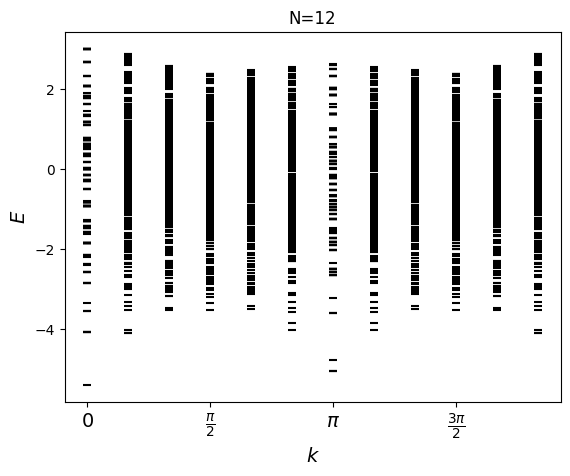

In [ ]:
for i in range(N):
    plt.scatter([i]*len(energy[i]),energy[i],marker='_',color='black')
plt.xlabel(r'$k$',fontsize=14)
plt.ylabel(r'$E$',fontsize=14)
plt.xticks([0,int(N/4),int(N/2),int(3*N/4)],[r'$0$',r'$\frac{\pi}{2}$',r'${\pi}$',r'$\frac{3\pi}{2}$'],fontsize=14)
plt.title('N='+str(N))
#plt.ylim(-8.1,-6.5)

<font  face=Times color=darkblue size=3>  The spin-1 chain energy spectra are kindly provided to us from Prof. Han-Qing Wu from Sun Yat-Sen University in Guang zhou. They have used the Lanczos method to reduced the size of the Hamiltonian matrices, which would be $3^N \times 3^N$ (531441 $\times$ 531441 when $N=12$ and 43046721 $\times$ 43046721 when $N=16$) if one constructed naively.

In [ ]:
!git clone https://github.com/hylu666/hku-physics4150/
np_load_old=np.load
#np.load.__defaults__=(None, True, True, 'ASCII')
np.load=lambda *a, **k: np_load_old(*a,allow_pickle=True)

fatal: destination path 'hku-physics4150' already exists and is not an empty directory.


In [ ]:
energy_16=np.load('/content/hku-physics4150/ED/s_onehalf_16.npy').item()
energy_12=copy.deepcopy(energy)

csv_file=open('/content/hku-physics4150/ED/Haldane_L_12_test2_En.csv','r')
reader=csv.reader(csv_file)
s1_12=[]
for item in reader:
    if reader.line_num==1:
        continue
    s1_12.append((item))
csv_file.close()
for i in range(len(s1_12)):
    for j in range(2):
        s1_12[i][j]=float(s1_12[i][j])
s1_12=np.array(s1_12)

csv_file=open('/content/hku-physics4150/ED/haldane_L16_20.csv','r')
reader=csv.reader(csv_file)
s1_16=[]
for item in reader:
    if reader.line_num==1:
        continue
    s1_16.append((item))
csv_file.close()
for i in range(len(s1_16)):
    for j in range(1,3):
        s1_16[i][j]=float(s1_16[i][j])
s1_16=np.array(s1_16,dtype=float)


(-0.2, 4.0)

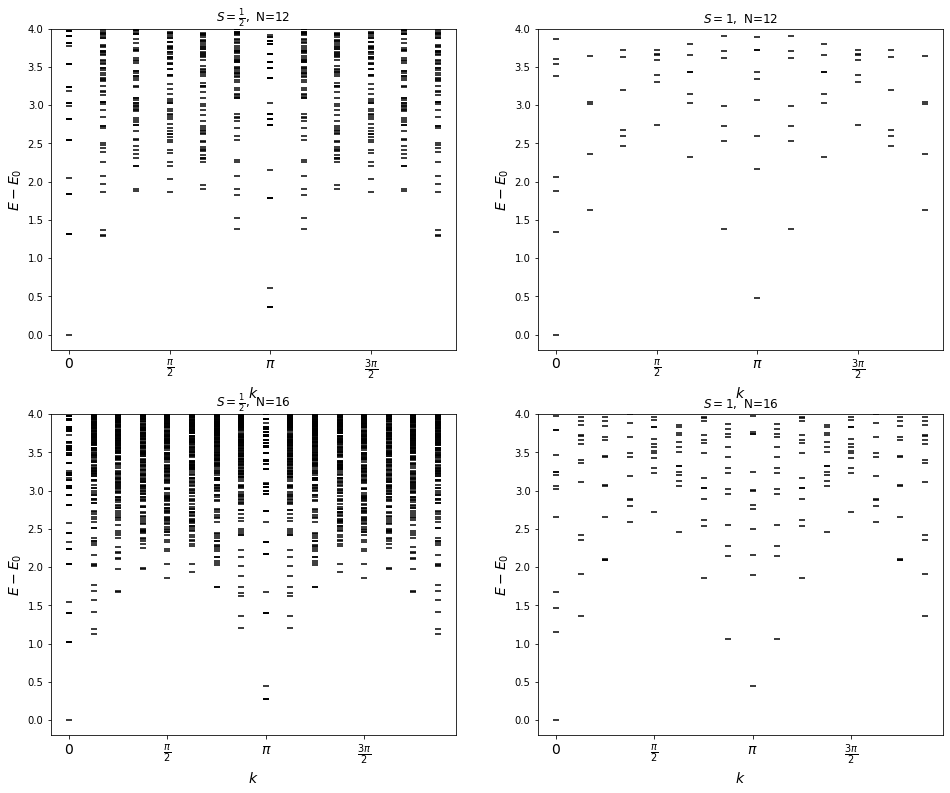

In [ ]:
fig=plt.figure(figsize=(16,13))
ax1=fig.add_subplot(2,2,1)
for i in range(12):
    ax1.scatter([i]*len(energy_12[i]),energy_12[i]-min(energy_12[0]),marker='_',color='black')
plt.xlabel(r'$k$',fontsize=14)
plt.ylabel(r'$E-E_0$',fontsize=14)
plt.xticks([0,int(12/4),int(12/2),int(3*12/4)],[r'$0$',r'$\frac{\pi}{2}$',r'${\pi}$',r'$\frac{3\pi}{2}$'],fontsize=14)
plt.title(r'$S=\frac{1}{2},\ $'+'N='+str(12))
plt.ylim(-0.2,4)
ax2=fig.add_subplot(2,2,2)
ax2.scatter(s1_12[:,1],s1_12[:,0]-min(s1_12[:,0]),marker='_',color='black')
plt.xlabel(r'$k$',fontsize=14)
plt.ylabel(r'$E-E_0$',fontsize=14)
plt.xticks([0,np.pi/2,np.pi,3*np.pi/2],[r'$0$',r'$\frac{\pi}{2}$',r'${\pi}$',r'$\frac{3\pi}{2}$'],fontsize=14)
plt.title(r'$S=1,\ $'+'N='+str(12))
plt.ylim(-0.2,4)
ax3=fig.add_subplot(2,2,3)
for i in range(16):
    ax3.scatter([i]*len(energy_16[i]),energy_16[i]-min(energy_16[0]),marker='_',color='black')
plt.xlabel(r'$k$',fontsize=14)
plt.ylabel(r'$E-E_0$',fontsize=14)
plt.xticks([0,int(16/4),int(16/2),int(3*16/4)],[r'$0$',r'$\frac{\pi}{2}$',r'${\pi}$',r'$\frac{3\pi}{2}$'],fontsize=14)
plt.title(r'$S=\frac{1}{2},\ $'+'N='+str(16))
plt.ylim(-0.2,4)
ax4=fig.add_subplot(2,2,4)
ax4.scatter(s1_16[:,2],s1_16[:,1]-min(s1_16[:,1]),marker='_',color='black')
plt.xlabel(r'$k$',fontsize=14)
plt.ylabel(r'$E-E_0$',fontsize=14)
plt.xticks([0,np.pi/2,np.pi,3*np.pi/2],[r'$0$',r'$\frac{\pi}{2}$',r'${\pi}$',r'$\frac{3\pi}{2}$'],fontsize=14)
plt.title(r'$S=1,\ $'+'N='+str(16))
plt.ylim(-0.2,4)

# Combining the Magnetization Conservation and Translational Invariance Symmetry

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import csv

In [3]:
# set parameters
N=14
dimension=2**N
#spin chain with all spin-down
z='0'*N
method=1

In [6]:
energy = {}
states = {}
for state in range(dimension):
    chain_here = bin(state)[2:]
    num_spinup = chain_here.count('1')

    if num_spinup not in states:
        states[num_spinup] = []

    states[num_spinup].append(state)

for spin_up in range(0,N+1):
    print(spin_up)
    if spin_up not in energy:
        energy[spin_up] = {}
    for m in range(0,N):
        d = 0
        R_list = []
        state_list = []
        for state in states[spin_up]:
            chain_here = bin(state)[2:]
            length = len(chain_here)
            chain_here = z[0:N-length]+chain_here
            for ii in range(1,N+1):

                chain_here = chain_here[N-1] + chain_here[0:N-1]
                state_t = int(chain_here,2)
                if state_t < state:
                    break
                if state_t == state:
                    if np.mod(m*ii,N) == 0:
                        d = d+1
                        R_list.append(ii)
                        state_list.append(state)
                        break
                    else:
                        break

        Hm = np.zeros((d,d),dtype='complex')
        for a in range(d):
            for j in range(N):
                k = np.mod(j+1,N)
                s_a = bin(state_list[a])[2:]
                chain_m = z[0:N-len(s_a)]+s_a
                if chain_m[j] == chain_m[k]:
                    Hm[a,a] += 1/4
                else:
                    Hm[a,a] -= 1/4
                    chain_new = copy.deepcopy(chain_m)
                    element_j = chain_new[j]
                    element_k = chain_new[k]
                    if method==0:
                        if k==0:
                            chain_new = element_j + chain_new[1:N-1] + element_k
                        else:
                            chain_new=chain_new[0:j]+element_k+element_j+chain_new[k+1:]
                        r=int(chain_new,2)
                        t=copy.deepcopy(chain_new)
                    else: # using the .join way to exchange the k and j
                        chain1=list(chain_new)
                        chain1[j]=element_k
                        chain1[k]=element_j
                        r=int(''.join(chain1),2)
                        t=copy.deepcopy(''.join(chain1))
                    l = 0
                    for iii in range(1,N):
                        t = t[N-1] + t[0:N-1]
                        s_t = int(t,2)
                        if s_t < r:
                            r = s_t
                            l = iii
                    if r in state_list:
                        b = state_list.index(r)
                        Hm[a,b]+=0.5*np.sqrt(R_list[a]/R_list[b])*np.exp(-1j*2*np.pi*m*l/N) # off-diagonal

        eig_v=np.real(np.linalg.eig(Hm)[0])
        energy[spin_up][m] = eig_v




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


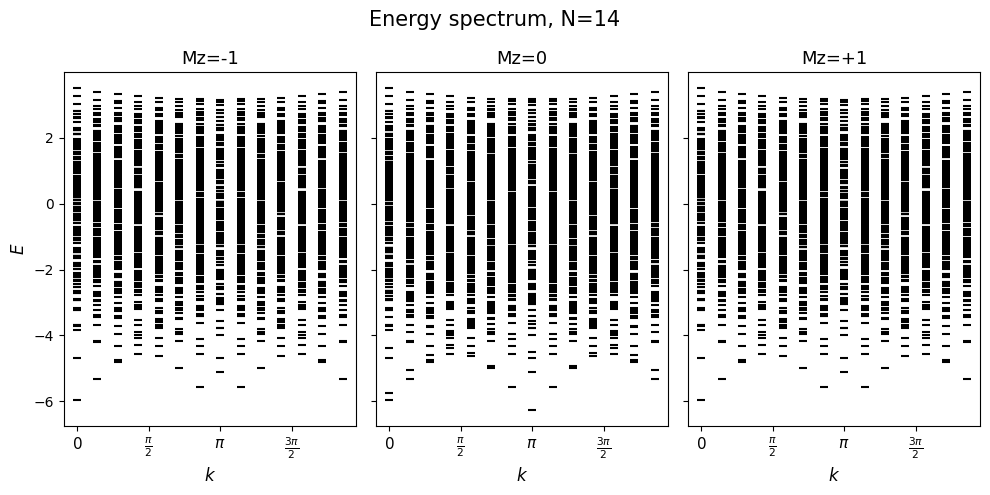

In [31]:
import matplotlib.pyplot as plt
import numpy as np

spin_ups = [N//2 - 1, N//2, N//2 + 1]
Mz_vals = np.array(spin_ups) - N//2
titles = [f'Mz={val:+d}' if val > 0 else f'Mz={val:d}' for val in Mz_vals]

fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

for ax, su, title in zip(axes, spin_ups, titles):
    if su not in energy:
        ax.set_title(title + ' (no data)')
        ax.set_xlabel(r'$k$', fontsize=12)
        continue
    for m, eigs in energy[su].items():
        k_val = 2 * np.pi * m / N   # 统一转成动量
        ax.scatter([k_val]*len(eigs), eigs, marker='_', color='black')
    ax.set_title(title, fontsize=13)
    ax.set_xlabel(r'$k$', fontsize=12)
    ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
    ax.set_xticklabels(
        [r'$0$', r'$\frac{\pi}{2}$', r'${\pi}$', r'$\frac{3\pi}{2}$'],
        fontsize=11
    )

axes[0].set_ylabel(r'$E$', fontsize=12)
fig.suptitle(f'Energy spectrum, N={N}', fontsize=15)
plt.tight_layout()
plt.show()
